### 1. Scala's real-world project repository data

With almost 30k commits and a history spanning over ten years, Scala is a mature programming language. It is a general-purpose programming language that has recently become another prominent language for data scientists.

Scala is also an open source project. Open source projects have the advantage that their entire development histories -- who made changes, what was changed, code reviews, etc. -- are publicly available.

We're going to read in, clean up, and visualize the real world project repository of Scala that spans data from a version control system (Git) as well as a project hosting site (GitHub). We will find out who has had the most influence on its development and who are the experts.

The dataset we will use, which has been previously mined and extracted from GitHub, is comprised of three files:

    pulls_2011-2013.csv contains the basic information about the pull requests, and spans from the end of 2011 up to (but not including) 2014.
    pulls_2014-2018.csv contains identical information, and spans from 2014 up to 2018.
    pull_files.csv contains the files that were modified by each pull request.


In [28]:
# Importing pandas
import pandas as pd
import os 
# current_dir = os.getcwd()
# print(current_dir)

# df_names = ['pulls_one', 'pulls_two','pull_files']

# my_dir = os.path.join(current_dir, 'datasets')
# print(my_dir)

# # list of all files and subfolders in the specified directory
# dir_list = os.listdir(my_dir)
# print(dir_list)

# my_files =[]
# for file in dir_list:
#     print(file)
#     if file.endswith('csv'):
#         my_files.append(os.path.join(my_dir, file))
#     else: 
#         continue
        
# print(type(my_files[0]))

# print(my_files[0])

# with open(my_files[0]) as my_file:
#     pull_files =pd.read_csv(my_file[0])

# Check the data
pull_files =pd.read_csv(r'D:\datacamp\Project\P3 The GitHub History of the Scala Language\datasets\pull_files.csv')
pulls_one = pd.read_csv(r'D:\datacamp\Project\P3 The GitHub History of the Scala Language\datasets\pulls_2011-2013.csv')
pulls_two = pd.read_csv(r'D:\datacamp\Project\P3 The GitHub History of the Scala Language\datasets\pulls_2014-2018.csv')

### 2. Preparing and cleaning the data
- combine the data from the two separate pull DataFrames, append pulls_one to pulls_two
- convert the strings into Python's DateTime objects, all in UTC (also known as Coordinated Universal Time)

In [29]:
# Append pulls_one to pulls_two
pulls = pulls_two.append(pulls_one)

# Convert the date for the pulls object
pulls['date'] = pd.to_datetime(pulls['date'],utc=True)

pulls.head(3)

,pid,user,date
0,163314316,hrhino,2018-01-16 23:29:16+00:00
1,163061502,joroKr21,2018-01-15 23:44:52+00:00
2,163057333,mkeskells,2018-01-15 23:05:06+00:00


### 3. Merging the DataFrames
- Merging the two DataFrames: pulls and pulls_files  for us to analyze the data in the future tasks.

In [30]:
# Merge the two DataFrames
data = pulls.merge(pull_files,on='pid')
data.head(2)

,pid,user,date,file
0,163314316,hrhino,2018-01-16 23:29:16+00:00,test/files/pos/t5638/Among.java
1,163314316,hrhino,2018-01-16 23:29:16+00:00,test/files/pos/t5638/Usage.scala


### 4. Is the project still actively maintained?

The data used in this project was collected in January of 2018. We are interested in the evolution of the number of contributions up to that date.

For Scala, we will do this by plotting a chart of the project's activity. We will 
- calculate the number of pull requests submitted each (calendar) month during the project's lifetime. 
- then plot the counted numbers to see the trend of contributions

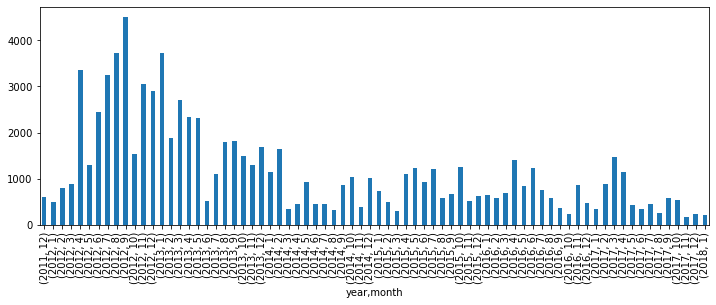

In [34]:
%matplotlib inline

# Create a column that will store the month
data['month'] = data['date'].dt.month

# Create a column that will store the year
data['year'] = data['date'].dt.year

# Group by the month and year and count the pull requests
counts = data.groupby(['year','month'])['pid'].count()

# Plot the results
counts.plot(kind='bar', figsize = (12,4))

### 5. project has large users or small users?
- a small community might indicate a high barrier of entry. 
- a large community can serve as a good indicator that the project is regularly accepting pull requests from new contributors. 

In order to evaluate the dynamics of the community, we will 
- plot a histogram of the number of pull requests submitted by each user.
A distribution that shows that there are few people that only contribute a small number of pull requests can be used as in indicator that the project is not welcoming of new contributors. 

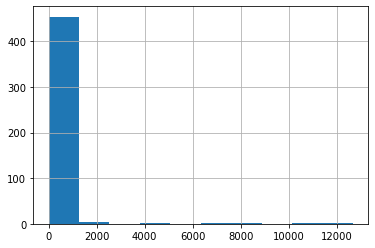

In [35]:
# Required for matplotlib
%matplotlib inline

# Group by the submitter
by_user = data.groupby(['user'])['pid'].count()

# Plot the histogram
by_user.hist()

### 6. What files were changed in the last ten pull requests?

Choosing the right place to make a contribution is as important as choosing the project to contribute to. Some parts of the code might be stable, some might be dead. Contributing there might not have the most impact. Therefore it is important to 
- find the parts of the system that have been recently changed. 
- pinpoint the "hot" areas of the code where most of the activity is happening. 

In [42]:
# Identify the last 10 pull requests
last_10 = pulls.sort_values(by = 'date').tail(10)
print(last_10)
print('\n')

# Join the two data sets
joined_pr = last_10.merge(pull_files, on='pid')
print(joined_pr.head(3))

# Identify the unique files as a set object
files = set(joined_pr['file'])

# Print the results
files

         pid         user                      date
9  162011899     joroKr21 2018-01-10 00:45:57+00:00
8  162197834    SethTisue 2018-01-10 18:31:25+00:00
7  162256029    mkeskells 2018-01-10 23:20:03+00:00
6  162643301       hrhino 2018-01-12 14:29:49+00:00
5  162765232  howtonotwin 2018-01-13 04:37:17+00:00
4  162838837    zuvizudar 2018-01-14 19:16:16+00:00
3  162985594        lrytz 2018-01-15 15:52:39+00:00
2  163057333    mkeskells 2018-01-15 23:05:06+00:00
1  163061502     joroKr21 2018-01-15 23:44:52+00:00
0  163314316       hrhino 2018-01-16 23:29:16+00:00


         pid       user                      date  \
0  162011899   joroKr21 2018-01-10 00:45:57+00:00   
1  162011899   joroKr21 2018-01-10 00:45:57+00:00   
2  162197834  SethTisue 2018-01-10 18:31:25+00:00   

                                                file  
0  src/reflect/scala/reflect/internal/tpe/GlbLubs...  
1                        test/files/pos/t10686.scala  
2                                            LIC

{'LICENSE',
 'doc/LICENSE.md',
 'doc/License.rtf',
 'project/VersionUtil.scala',
 'src/compiler/scala/reflect/reify/phases/Calculate.scala',
 'src/compiler/scala/tools/nsc/backend/jvm/BCodeHelpers.scala',
 'src/compiler/scala/tools/nsc/backend/jvm/PostProcessor.scala',
 'src/compiler/scala/tools/nsc/backend/jvm/analysis/BackendUtils.scala',
 'src/compiler/scala/tools/nsc/profile/AsyncHelper.scala',
 'src/compiler/scala/tools/nsc/profile/Profiler.scala',
 'src/compiler/scala/tools/nsc/symtab/classfile/ClassfileParser.scala',
 'src/compiler/scala/tools/nsc/typechecker/Contexts.scala',
 'src/library/scala/Predef.scala',
 'src/library/scala/concurrent/Lock.scala',
 'src/library/scala/util/Properties.scala',
 'src/reflect/scala/reflect/internal/pickling/ByteCodecs.scala',
 'src/reflect/scala/reflect/internal/tpe/GlbLubs.scala',
 'src/scaladoc/scala/tools/nsc/doc/html/page/Entity.scala',
 'src/scalap/decoder.properties',
 'test/files/neg/leibniz-liskov.check',
 'test/files/neg/leibniz-liskov

### 7. Who made the most pull requests to a given file?

When contributing to a project, we might need some guidance. We might find ourselves needing some information regarding the codebase. It is important direct any questions to the right person. Contributors to open source projects generally have other day jobs, so their time is limited. It is important to address our questions to the right people. One way to identify the right target for our inquiries is by using their contribution history.

We identified src/compiler/scala/reflect/reify/phases/Calculate.scala as being recently changed. We are interested in the top 3 developers who changed that file. Those developers are the ones most likely to have the best understanding of the code.

Identify the top 3 developers that submitted pull requests to src/compiler/scala/reflect/reify/phases/Calculate.scala.

Select the pull requests that changed that file and name the resulting DataFrame file_pr.
Count the number of changes made by each developer and name the resulting DataFrame author_counts.
Print the top 3 developers.

In [44]:
# This is the file we are interested in:
file = 'src/compiler/scala/reflect/reify/phases/Calculate.scala'

# Identify the commits that changed the file
file_pr = data[data['file'] == file]

# Count the number of changes made by each developer
author_counts = file_pr.groupby(['user']).count()

# Print the top 3 developers
author_counts.sort_index(ascending=True)
author_counts.iloc[:3,:]
# author_counts.nlargest(3,'user')

,pid,date,file,month,year
user,,,,,
bjornregnell,1,1,1,1,1
densh,1,1,1,1,1
gkossakowski,1,1,1,1,1


### 8. Who made the last ten pull requests on a given file?
- projects suffer from fluctuating membership. 
- need to look at the history of src/compiler/scala/reflect/reify/phases/Calculate.scala.

In [47]:
file = 'src/compiler/scala/reflect/reify/phases/Calculate.scala'

# Select the pull requests that changed the target file
file_pr = data[data['file'] == file]

# Merge the obtained results with the pulls DataFrame
joined_pr = file_pr.merge(pulls,on='pid')
joined_pr.head(3)

# Find the users of the last 10 most recent pull requests
users_last_10 = set(joined_pr.nlargest(10,'pid')['user_x'])

# Printing the results
users_last_10

{'bjornregnell', 'retronym', 'soc', 'starblood', 'xeno-by', 'zuvizudar'}

### 9. The pull requests of two special developers

Now that we have identified two potential contacts in the projects, we need to 
- find the person who was most involved in the project in recent times. T
- For each calendar year, find the number of pull requests the authors submitted. 

          pid user                      date
745  93445328  soc 2016-11-12 17:21:25+00:00
746  93444157  soc 2016-11-12 16:40:31+00:00
747  93443506  soc 2016-11-12 16:17:08+00:00
  user  date   pid
             count
0  soc  2011    12
1  soc  2012    44
2  soc  2013   117


C:\Users\xu6416\Anaconda3\lib\site-packages\pandas\core\generic.py:3936: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


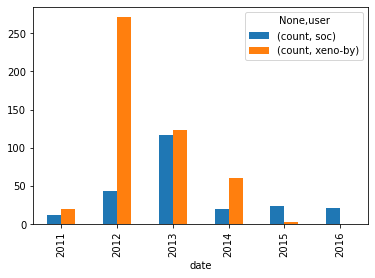

In [66]:
%matplotlib inline

# The developers we are interested in
authors = ['xeno-by', 'soc']

# Get all the developers' pull requests
by_author = pulls[pulls['user'].isin(authors)]
print(by_author.head(3))

# Count the number of pull requests submitted each year
counts = by_author.groupby(['user',by_author['date'].dt.year]).agg({'pid': ['count']}).reset_index()
print(counts.head(3))

# Convert the table to a wide format
counts_wide = counts.pivot_table(index='date', columns='user', values='pid', fill_value=0)
counts_wide

# Plot the results
counts_wide.plot(kind='bar')

### 10. Visualizing the contributions of each developer

As mentioned before, it is important to make a distinction between the global expertise and contribution levels and the contribution levels at a more granular level (file, submodule, etc.) In our case, we want to see 
- which of our two developers of interest have the most experience with the code in a given file.
- measure experience by the number of pull requests submitted that affect that file and how recent those pull requests were submitted.

           pid user                      date  \
7989  93445328  soc 2016-11-12 17:21:25+00:00   
7990  93445328  soc 2016-11-12 17:21:25+00:00   
7991  93445328  soc 2016-11-12 17:21:25+00:00   

                                                   file  month  year  
7989  src/compiler/scala/tools/nsc/backend/jvm/BCode...     11  2016  
7990  src/compiler/scala/tools/nsc/backend/jvm/BCode...     11  2016  
7991  src/compiler/scala/tools/nsc/transform/Constru...     11  2016  


            pid     user                      date  \
32753  12102550  xeno-by 2014-02-01 01:19:58+00:00   
46700   5320191      soc 2013-04-23 15:47:45+00:00   
52527   4019878      soc 2013-02-06 18:24:21+00:00   

                                                    file  month  year  
32753  src/compiler/scala/reflect/reify/phases/Calcul...      2  2014  
46700  src/compiler/scala/reflect/reify/phases/Calcul...      4  2013  
52527  src/compiler/scala/reflect/reify/phases/Calcul...      2  2013  




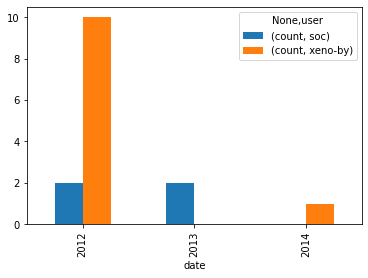

In [71]:
authors = ['xeno-by', 'soc']
file = 'src/compiler/scala/reflect/reify/phases/Calculate.scala'

# Select the pull requests submitted by the authors, from the `data` DataFrame
by_author = data[data['user'].isin(authors)]
print(by_author.head(3))
print('\n')

# Select the pull requests that affect the file
by_file = by_author[by_author['file'].isin([file])]
print(by_file.head(3))  
print('\n')

# Group and count the number of Pids done by each user each year
grouped = by_file.groupby(['user', by_file['date'].dt.year]).agg({'pid':['count']})

# Transform the data into a wide format
by_file_wide = grouped.pivot_table(index='date', columns='user', values='pid', fill_value=0)

# Plot the results
by_file_wide.plot(kind='bar')